In [2]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("./data/bank-additional-full.csv", sep=';')

# Chuyển đổi biến mục tiêu
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Kiểm tra
print(df['y'].value_counts())

y
0    36548
1     4640
Name: count, dtype: int64


In [3]:
# Mã hóa biến phân loại
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo mô hình CART
cart_clf = DecisionTreeClassifier(
    criterion='gini',  # hoặc 'entropy'
    max_depth=4,
    random_state=42
)

# Huấn luyện
cart_clf.fit(X_train, y_train)

# Dự đoán
y_pred = cart_clf.predict(X_test)

# Đánh giá
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Độ chính xác: 0.9157562515173586
[[7008  302]
 [ 392  536]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.64      0.58      0.61       928

    accuracy                           0.92      8238
   macro avg       0.79      0.77      0.78      8238
weighted avg       0.91      0.92      0.91      8238



In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

cart_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
cart_reg.fit(X_train, y_train)

y_pred_reg = cart_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R²:", r2_score(y_test, y_pred_reg))


MSE: 0.058827504219717816
R²: 0.4114834969692487


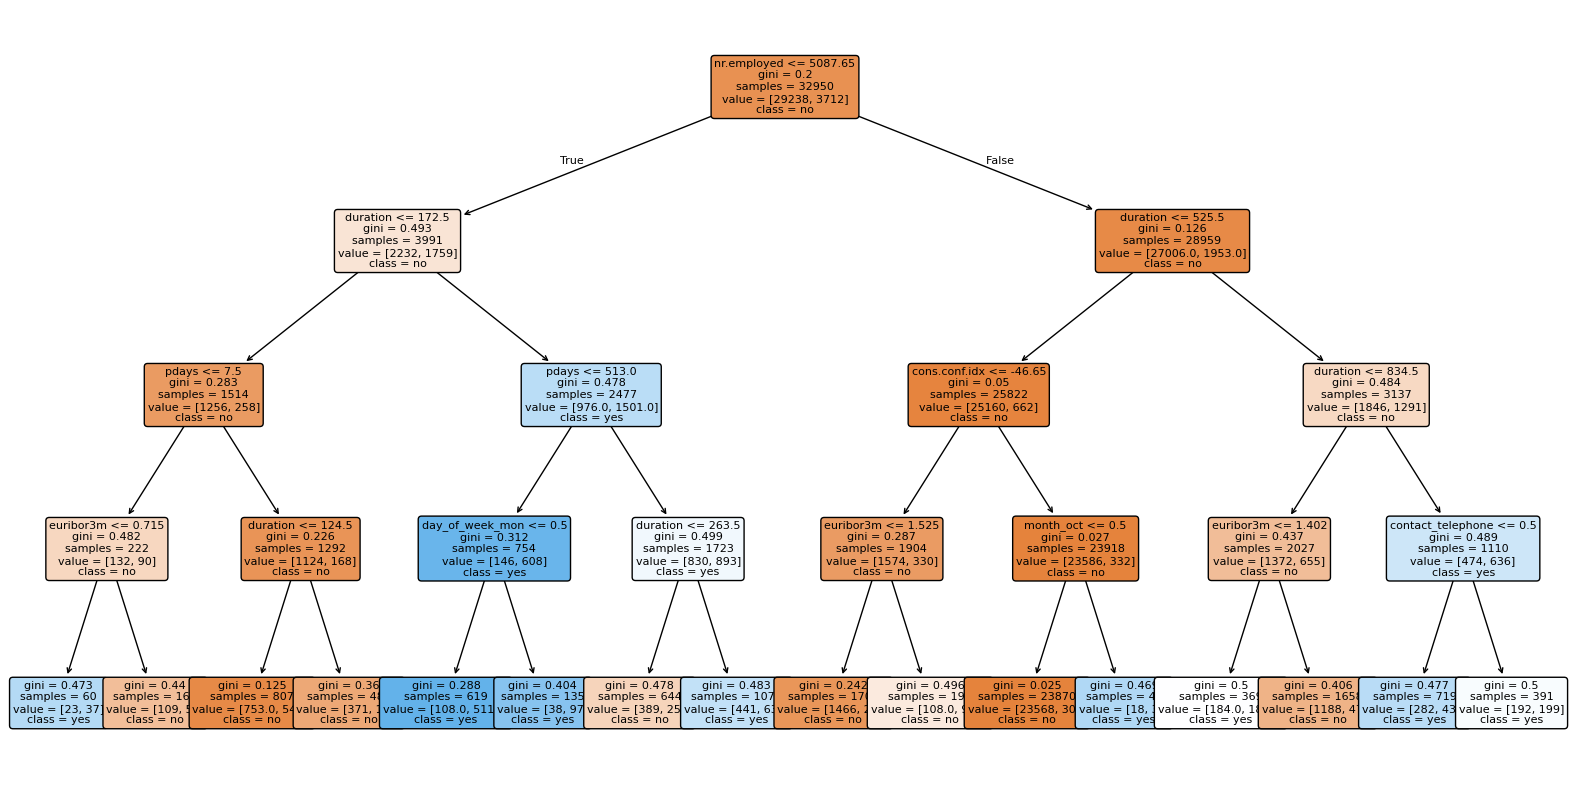

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(cart_clf, 
               filled=True, 
               feature_names=X.columns, 
               class_names=['no', 'yes'], 
               rounded=True, fontsize=8)
plt.show()